<h1 style="color:#3295ec;"><center>بسم الله الرحمن الرحيم</center></h1>

<h3 style="color:#3295ec;"><center>تمرین دوم شناسایی الگو</center></h3>
<p style="text-align: right;"> نام و نام خانوادگی :شقایق جلالی</p>
<p style="text-align: right;">97722068:شماره دانشجویی</p>



<p style="text-align: right;">مرحله ی اول : کتابخانه های لازم را وارد کرده </p>


In [32]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn import svm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import glob
import math
import smotee


In [33]:
import warnings
warnings.filterwarnings("ignore")

<p style="text-align: right;"> مرحله ی دوم: مسیر داده ها را وارد میکنیم   </p>

In [3]:
data_path = ['/home/shaghayegh/Documents/pattern/project2/data/1/*.txt', '/home/shaghayegh/Documents/pattern/project2/data/2/*.txt', '/home/shaghayegh/Documents/pattern/project2/data/3/*.txt',
             '/home/shaghayegh/Documents/pattern/project2/data/4/*.txt', '/home/shaghayegh/Documents/pattern/project2/data/5/*.txt']

<p style="text-align: right;">مرحله ی سوم: داده ها را لیبل شان را بررسی میکنیم و ترین ست و تست ست را میسازیم   </p>

In [4]:
def pretrain(path):
    training_set = []
    test_set = []
    training_labels = []
    test_labels = []
    minority_class = []
    majority_class = []
    files = glob.glob(path)
    for file in files:
        with open(file) as dataa:
            if "tra" in file:
                lines = dataa.readlines()
                for line in lines:
                    bag = line.split(",")
                    label = bag[-1]
                    del bag[-1]
                    bag = [float(i) for i in bag]

                    if label == ' positive\n':
                        training_labels.append(1)
                        minority_class.append(bag)
                        
                    else:
                        training_labels.append(-1)
                        majority_class.append(bag)

                    training_set.append(bag)
            elif "tst" in file:
                lines = dataa.readlines()
                for line in lines:
                    bag = line.split(",")
                    label = bag[-1]
                    del bag[-1]
                    bag = [float(i) for i in bag]

                    if label == ' positive\n':
                        test_labels.append(1)
                    else:
                        test_labels.append(-1)

                    test_set.append(bag)


    return training_set ,test_set,training_labels,test_labels ,minority_class, majority_class


In [5]:
def smote(num, min_class):
    kn=5
    """ smote method main function
     num:Number of minority class samples
     kn: Number of nearest neighbors
     min_class : minority sample
    """

    new = 0
    synthetic = []
    for s in range (0,num):
        #line 1 paper
        index = random.randint(1, len(min_class)) - 1
        knn(index, min_class[i],kn, synthetic, new, min_class)

    return synthetic


In [6]:
def knn(index, min_test,kn, synthetic, new, min_class):

    # make list for distances 
    distances = []
    temp = []
    for i in range(len(minority_class)):
        if minority_class[i][:] != min_test:
            # compute distance
            # line 13 paper
            distance = np.sqrt(np.sum(np.square(np.array(min_test) - np.array(minority_class[i][:]))))
            distances.append([distance, i])

    distances = sorted(distances)
    nn = random.randint(1, kn) - 1
    for feature_position in range(0, 6):
        dif = min_class[nn][feature_position] - min_class[index][feature_position]
        gap = random.random()
        #line 23 paper
        temp.insert(feature_position, min_class[index][feature_position] + gap * dif)

    synthetic.insert(new, temp)

    return 


In [7]:
def random_balance():
    new_training_set = []
    new_training_labels = []
    #line one paper
    total_size = len(training_set)
    #line 4 paper
    minority_size = len(minority_class)
    #line 5 paper
    majority_size = len(majority_class)
    #line 6 paper
    new_majority_size = random.randint(2, total_size - 2)
    #line 7 paper
    new_minority_size = total_size - new_majority_size
    #line 8 paper
    if new_majority_size < majority_size:
        #line 9 paper
        new_training_set.extend(minority_class)
        listOfStrings1 = [int(1) for i in range(minority_size)]
        new_training_labels.extend(listOfStrings1)
        #print(type(new_training_labels[1]))
        #line 10 paper
        new_training_set.extend(random.sample(majority_class, new_majority_size))
        listOfStrings2 = [int(-1) for i in range(new_majority_size)]
        new_training_labels.extend(listOfStrings2)
        #line 11 paper
        # Create newMinoritySize- minoritySize artificial examples  using SMOTE
        new_training_set.extend(smote(new_minority_size - minority_size, minority_class))
        listOfStrings3 = [int(1) for i in range(new_minority_size - minority_size)]
        new_training_labels.extend(listOfStrings3)
    #line 12 paper
    else:
        #line 13 paper
        new_training_set.extend(majority_class)
        listOfStrings4 = [int(-1) for i in range(majority_size)]
        new_training_labels.extend(listOfStrings4)
        #line 14 paper
        new_training_set.extend(random.sample(minority_class, new_minority_size))
        listOfStrings5 = [int(1) for i in range(new_minority_size)]
        new_training_labels.extend(listOfStrings5)
        #line 15 paper
        #Create newMajoritySize- majoritySize artificial examples using SMOTE
        new_training_set.extend(smote(new_majority_size - majority_size, majority_class))
        listOfStrings6 = [int(-1) for i in range(new_majority_size - majority_size)]
        new_training_labels.extend(listOfStrings6)
        #line 17 paper

    return new_training_set, new_training_labels


In [8]:
def rb_boost(training_set, T,s):
    classifier_list = []
    betas = []
    distribution=[]
    distributioni=[]
    #line 1 paper
    listOfStrings1 = [1 / len(training_set) for i in range( len(training_set))]
    distribution.extend(listOfStrings1)
    #line 2 paper
    for tt in range (0,T):
        listOfStrings2 = [int(0) for i in range( len(training_set))]
        distributioni.extend(listOfStrings2)
        #line 3 paper
        new_training_set, new_training_labels = random_balance()
        #line 4 paper
        for index in range(0, len(training_set)):
            if new_training_set[index] in training_set:  
                # If the example is from the sample it maintains its weight
                distributioni[index] = distribution[index]
            else:  
                # if the example is artificial it has the initial weight
                distributioni[index] = 1 / len(training_set)
            


        if int(s)==1:
            classifier = DecisionTreeClassifier(max_depth=1)
        elif int(s)==2:
            classifier = svm.SVC(kernel = 'linear', probability = True)
        elif int(s)==3:
            classifier = svm.SVC(kernel = 'poly', probability = True)
        elif int(s)==4:
            classifier = svm.SVC(kernel = 'rbf', probability = True)
        elif int (s) == 5:
            classifier = svm.SVC(kernel = 'sigmoid', probability = True)

        else:
            classifier = tree.DecisionTreeClassifier()

        
        classifier.fit(new_training_set, new_training_labels)


        classifier_list.append(classifier)

        predict = classifier.predict(new_training_set)
        proba = classifier.predict_proba(new_training_set)
        
        #line 6 paper

            
        et= 0
     
        for i in range(0, len(proba)):
            if new_training_labels[i]==1:
                lt=1
            elif new_training_labels[i]==-1:
                lt=0
            if predict[i]==1:
                lp=1
            elif predict[i]==-1:
                lp=0
            temp=(1 + proba[i][lp] - proba[i][lt])
            if predict[i] != new_training_labels[i]:
                et = et + (distributioni[i] * (1 - proba[i][lp] +
                   proba[i][lt]))


        #line 7 paper
        beta = et / (1 - et)
        #print (beta)
        if math.isnan(beta) or beta == 0:
            beta = 0.001
        #line 8 paper
        #distributioni=distributioni*(math.pow(float(beta), float(0.5*temp)))
        distrib=(math.pow((beta), (0.5*temp)))
        #line 9 paper
        distributioni[index]=distributioni[index]*float(distrib)
        
        betas.append(beta)


    return classifier_list, betas


In [9]:
def rb_boost_test(classifier_list, beta_list, test_set):
    classifier = classifier_list[0].classes_.tolist()
    f_proba = np.zeros((len(test_set), 2))
    for t in range(0, len(classifier_list)):
        proba = classifier_list[t].predict_proba(test_set)
        for s in range(0, len(test_set)):
            #line 11 paper
            proba[s] = [math.log(1 / beta_list[t]) * float(i) for i in proba[s]]

        f_proba = f_proba + np.array(proba)

    predict_label = []
    for ss in f_proba:
        if ss[0]>ss[1]:
            predict_label.append(-1)
        else:
            predict_label.append(1)
   
    return predict_label


In [10]:
T_f_score_tree = {'RbBoost_tree': [], 'Random Forest':[] ,'Adaboost-DecisionTree4.5': [] }
T_f_score_adaboost = {'Adaboost-DecisionTree4.5': [], 'Adaboost-DecisionStump': [], 'Adaboost-MLP': []}
T_f_score_forest = { 'Random Forest':[], 'Random Forest_stump':[],'bagging-log':[]}
decision_stump = {'Adaboost-DecisionStump': [],'Random Forest_stump':[] , 'rbboost_stump':[]}
T_f_score_RB = {'RbBoost_tree': [],'rbboost_stump':[],'rbboost_svm':[]}


پنجره پایین در هر مرحله حق انتخاب داریم از چه کلاسیفایری استفاده کنیم

# Rb boost classifier 
for size in [5,10, 50, 100]:
    f_score = 0
    s = input(" enter number 1 for decision tree\n enter number 2 for svm with kernel linear\n enter number 3 for svm with kernel poly\n enter number 4 for svm with kernel rbf\n enter number 5 for svm with kernel sigmoid\n")
    for i in range(0, 5):
        classifiers, betas = rb_boost(training_set, size ,s)
        given_labels = rb_boost_test(classifiers, betas, test_set)
        f_score += f1_score(test_labels, given_labels,  pos_label=1, average='weighted')

    T_f_score_RB['Rb Boost'].append((f_score / 5)*100)
    print('Rb Boost:', size)
    print((f_score / 5)*100)

In [15]:
# Rb boost classifier
s = input(" enter number 1 for decision stump\n enter number 2 for svm with kernel linear\n enter number 3 for svm with kernel poly\n enter number 4 for svm with kernel rbf\n enter number 5 for svm with kernel sigmoid\n enter 6 for decision tree c 4.5 \n")
for size in [5,10, 50, 100]:
    f_score = 0
    for i in range(0, 5):
        training_set ,test_set,training_labels,test_labels ,minority_class, majority_class = pretrain(data_path[i])
        classifiers, betas = rb_boost(training_set, size ,s)
        given_labels = rb_boost_test(classifiers, betas, test_set)
        f_score += f1_score(test_labels, given_labels,  pos_label=1, average='weighted')
    if int(s)==1:   
        decision_stump ['rbboost_stump'].append((f_score / 5)*100)
        T_f_score_RB['rbboost_stump'].append((f_score / 5)*100)
    elif int(s)==6:
        T_f_score_RB['RbBoost_tree'].append((f_score / 5)*100)
        T_f_score_tree['RbBoost_tree'].append((f_score / 5)*100)
    else :
        T_f_score_RB ['rbboost_svm'].append((f_score / 5)*100)
                    
    print('Rb Boost:', size)
    print((f_score / 5)*100)

 enter number 1 for decision stump
 enter number 2 for svm with kernel linear
 enter number 3 for svm with kernel poly
 enter number 4 for svm with kernel rbf
 enter number 5 for svm with kernel sigmoid
 enter 6 for decision tree c 4.5 
6
Rb Boost: 5
96.36319817225451
Rb Boost: 10
95.23306391316808
Rb Boost: 50
95.84432295675009
Rb Boost: 100
95.91911042479599


In [16]:
T_f_score_RB

{'RbBoost_tree': [96.36319817225451,
  95.23306391316808,
  95.84432295675009,
  95.91911042479599],
 'rbboost_stump': [86.81321110898111,
  90.92680091529401,
  90.90803112655558,
  90.28928334961253],
 'rbboost_svm': [96.3036055479021,
  96.6133835169093,
  97.00929667144311,
  96.22413793103448]}

     RbBoost_tree  rbboost_stump  rbboost_svm
5       96.363198      86.813211    96.303606
10      95.233064      90.926801    96.613384
50      95.844323      90.908031    97.009297
100     95.919110      90.289283    96.224138


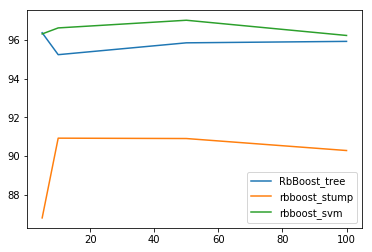

In [17]:
daig = pd.DataFrame(data=T_f_score_RB,index= [5,10, 50, 100])
print(daig)
plt.figure()
daig.plot()
plt.show()

In [18]:
#adaboost decision tree classifier
for size in [5, 10, 50, 100]:
    adaboost_DecisionTree = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='gini'), n_estimators = size)
    f_score =0
    for i in range(0, 5):
        training_set ,test_set,training_labels,test_labels ,minority_class, majority_class = pretrain(data_path[i])
        adaboost_DecisionTree.fit(training_set, training_labels)
        given_labels = adaboost_DecisionTree.predict(test_set)
        f_score += f1_score(test_labels, given_labels,  pos_label=1, average='weighted')

 
    T_f_score_tree['Adaboost-DecisionTree4.5'].append((f_score / 5)*100)
    T_f_score_adaboost['Adaboost-DecisionTree4.5'].append((f_score / 5)*100)
    print('Adaboost-DecisionTree4.5:', size)
    print((f_score / 5)*100)
    
    

Adaboost-DecisionTree4.5: 5
94.59151304017637
Adaboost-DecisionTree4.5: 10
95.232945681609
Adaboost-DecisionTree4.5: 50
95.71698144150682
Adaboost-DecisionTree4.5: 100
94.53200502083664


In [19]:
#adaboost ‫‪Decision Stump‬‬ Classifier
for size in [5, 10, 50, 100]:
    adaboost_DecisionStump = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators = size)
    f_score = 0
    for i in range(0, 5):
        training_set ,test_set,training_labels,test_labels ,minority_class, majority_class = pretrain(data_path[i])
        adaboost_DecisionStump.fit(training_set, training_labels)
        given_labels = adaboost_DecisionStump.predict(test_set)
        f_score += f1_score(test_labels, given_labels,  pos_label=1, average='weighted')
    decision_stump['Adaboost-DecisionStump'].append((f_score / 5)*100)
    T_f_score_adaboost['Adaboost-DecisionStump'].append((f_score / 5)*100)
    
    print('Adaboost-DecisionStump:', size)
    print((f_score / 5)*100)

Adaboost-DecisionStump: 5
96.03810712799475
Adaboost-DecisionStump: 10
96.1411238825032
Adaboost-DecisionStump: 50
95.83409466536162
Adaboost-DecisionStump: 100
95.83409466536162


In [20]:

#smote_boost‬‬ Classifier
for size in [5, 10, 50, 100]:
    smote_boost = smotee.SMOTEBoost(n_estimators=size, base_estimator =DecisionTreeClassifier(max_depth=1))
    f_score = 0
    for i in range(0, 5):
        training_set ,test_set,training_labels,test_labels ,minority_class, majority_class = pretrain(data_path[i])
        smote_boost.fit(training_set, training_labels)
        given_labels = smote_boost.predict(test_set)
        f_score += f1_score(test_labels, given_labels,  pos_label=1, average='weighted')

    
    print('smote_boost:', size)
    print((f_score / 5)*100)

smote_boost: 5
93.4763426524136
smote_boost: 10
94.8426742701001
smote_boost: 50
94.95064769202702
smote_boost: 100
96.10235358511223


In [21]:
#bagging classifier =random forest with LogisticRegression
for size in [5, 10, 50, 100]:
    adaboost_ANN_clf = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators = size)
    f_score =0
    for i in range(0, 5):
        training_set ,test_set,training_labels,test_labels ,minority_class, majority_class = pretrain(data_path[i])
        adaboost_ANN_clf.fit(training_set, training_labels)
        given_labels = adaboost_ANN_clf.predict(test_set)
        f_score += f1_score(test_labels, given_labels,  pos_label=1, average='weighted')

    T_f_score_forest['bagging-log'].append((f_score / 5)*100)
    print('bagging-log:', size)
    print((f_score / 5)*100)
    




bagging-log: 5
94.64048531289912
bagging-log: 10
95.30268199233717
bagging-log: 50
94.51085568326948
bagging-log: 100
94.51085568326948


In [22]:
#adaboost classifier with perceptron
for size in [5, 10, 50, 100]:
    adaboost_ANN_clf = AdaBoostClassifier(base_estimator=Perceptron(), n_estimators = size, algorithm='SAMME')
    f_score = 0
    for i in range(0, 5):
        training_set ,test_set,training_labels,test_labels ,minority_class, majority_class = pretrain(data_path[i])
        adaboost_ANN_clf.fit(training_set, training_labels)
        given_labels = adaboost_ANN_clf.predict(test_set)
        f_score += f1_score(test_labels, given_labels,  pos_label=1, average='weighted')

    T_f_score_adaboost['Adaboost-MLP'].append((f_score / 5)*100)
    print('Adaboost-MLP :', size)
    print((f_score / 5)*100)

Adaboost-MLP : 5
94.63105641757326
Adaboost-MLP : 10
94.40652828819289
Adaboost-MLP : 50
95.232945681609
Adaboost-MLP : 100
93.80862805638856


In [23]:
#random forest classifier decision stump
for size in [5, 10, 50, 100]:
    random_forest_stump = RandomForestClassifier(max_depth=1, n_estimators=size)
    f_score = 0
    for i in range(0, 5):
        training_set ,test_set,training_labels,test_labels ,minority_class, majority_class = pretrain(data_path[i])
        random_forest_stump.fit(training_set, training_labels)
        given_labels = random_forest_stump.predict(test_set)
        f_score += f1_score(test_labels, given_labels,  pos_label=1, average='weighted')
    T_f_score_forest['Random Forest_stump'].append((f_score / 5)*100)
    decision_stump['Random Forest_stump'].append((f_score / 5)*100)
    print('Random Forest_stump :', size)
    print((f_score / 5)*100)

Random Forest_stump : 5
91.73948713176851
Random Forest_stump : 10
94.08069782178234
Random Forest_stump : 50
92.92038996484526
Random Forest_stump : 100
93.5618226062779


In [24]:
#random forest classifier decision tree
for size in [5, 10, 50, 100]:
    random_forest = RandomForestClassifier(criterion='gini',n_estimators=size)
    f_score = 0
    for i in range(0, 5):
        training_set ,test_set,training_labels,test_labels ,minority_class, majority_class = pretrain(data_path[i])
        random_forest.fit(training_set, training_labels)
        given_labels = random_forest.predict(test_set)
        f_score += f1_score(test_labels, given_labels,  pos_label=1, average='weighted')

    T_f_score_tree['Random Forest'].append((f_score / 5)*100)
    T_f_score_forest['Random Forest'].append((f_score / 5)*100)
    print('Random Forest :', size)
    print((f_score / 5)*100)

Random Forest : 5
96.49042145593872
Random Forest : 10
96.42068514521054
Random Forest : 50
96.84482758620689
Random Forest : 100
96.84482758620689


     Adaboost-DecisionTree4.5  Adaboost-DecisionStump  Adaboost-MLP
5                   94.591513               96.038107     94.631056
10                  95.232946               96.141124     94.406528
50                  95.716981               95.834095     95.232946
100                 94.532005               95.834095     93.808628


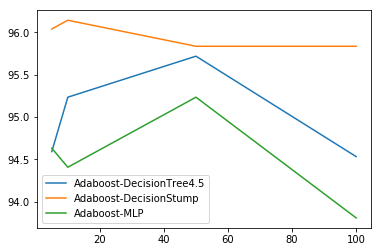

In [25]:
daig = pd.DataFrame(data=T_f_score_adaboost,index= [5,10, 50, 100])
print(daig)
plt.figure()
daig.plot()
plt.show()

In [26]:
T_f_score_forest

{'Random Forest': [96.49042145593872,
  96.42068514521054,
  96.84482758620689,
  96.84482758620689],
 'Random Forest_stump': [91.73948713176851,
  94.08069782178234,
  92.92038996484526,
  93.5618226062779],
 'bagging-log': [94.64048531289912,
  95.30268199233717,
  94.51085568326948,
  94.51085568326948]}

     Random Forest  Random Forest_stump  bagging-log
5        96.490421            91.739487    94.640485
10       96.420685            94.080698    95.302682
50       96.844828            92.920390    94.510856
100      96.844828            93.561823    94.510856


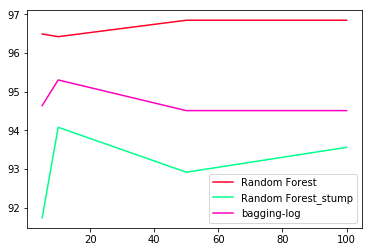

In [27]:
daig = pd.DataFrame(data=T_f_score_forest,index= [5,10, 50, 100])
print(daig)
plt.figure()
daig.plot(colormap='gist_rainbow')

plt.show()

In [28]:
T_f_score_tree

{'RbBoost_tree': [96.36319817225451,
  95.23306391316808,
  95.84432295675009,
  95.91911042479599],
 'Random Forest': [96.49042145593872,
  96.42068514521054,
  96.84482758620689,
  96.84482758620689],
 'Adaboost-DecisionTree4.5': [94.59151304017637,
  95.232945681609,
  95.71698144150682,
  94.53200502083664]}

     RbBoost_tree  Random Forest  Adaboost-DecisionTree4.5
5       96.363198      96.490421                 94.591513
10      95.233064      96.420685                 95.232946
50      95.844323      96.844828                 95.716981
100     95.919110      96.844828                 94.532005


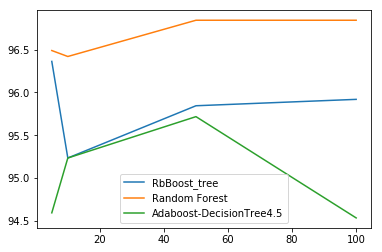

In [29]:
daig = pd.DataFrame(data=T_f_score_tree,index= [5,10, 50, 100])
print(daig)
plt.figure()
daig.plot()
plt.show()

In [30]:
decision_stump

{'Adaboost-DecisionStump': [96.03810712799475,
  96.1411238825032,
  95.83409466536162,
  95.83409466536162],
 'Random Forest_stump': [91.73948713176851,
  94.08069782178234,
  92.92038996484526,
  93.5618226062779],
 'rbboost_stump': [86.81321110898111,
  90.92680091529401,
  90.90803112655558,
  90.28928334961253]}

     Adaboost-DecisionStump  Random Forest_stump  rbboost_stump
5                 96.038107            91.739487      86.813211
10                96.141124            94.080698      90.926801
50                95.834095            92.920390      90.908031
100               95.834095            93.561823      90.289283


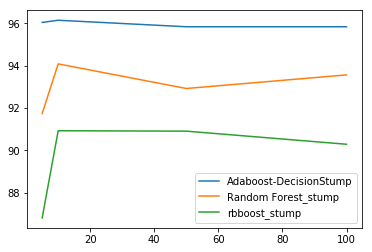

In [31]:
daig = pd.DataFrame(data=decision_stump,index= [5,10, 50, 100])
print(daig)
plt.figure()
daig.plot()
plt.show()